# File Mount

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ComputerVision')

Mounted at /content/drive


# 7 image point processing

In [2]:
from  matplotlib import pyplot as plt
import cv2
import numpy as np

image = cv2.imread("twins.jpg") # the decoded images will have the channels stored in B G R order.
image = image[:,:,::-1]
plt.imshow(image)
plt.show()
x=image.shape[0]
y=image.shape[1]
z=image.shape[2]

origin = cv2.imread("twins.jpg")
origin = origin[:,:,::-1]

###invert
invert = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      invert[i,j,k]=255 - image[i,j,k]
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(invert)
plt.title('invert')
plt.show()

###darken
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
darken = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      if((image[i,j,k] - 128) > 0):
        darken[i,j,k]= image[i,j,k] - 128
      else:
        darken[i,j,k]= 0
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(darken)
plt.title('darken')
plt.show()

###lighten
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
lighten = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      if(image[i,j,k]+128<255):
        lighten[i,j,k]=image[i,j,k]+128
      else:
        lighten[i,j,k]=255
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(lighten)
plt.title('lighten')
plt.show()

###lower_contrast
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
lowerc = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      lowerc[i,j,k]=image[i,j,k]/2
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(lowerc)
plt.title('lower contrast')
plt.show()

###raise_contrast
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
raisec = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      if(image[i,j,k]*2<255):
        raisec[i,j,k]=image[i,j,k]*2
      else:
        raisec[i,j,k]=255
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(raisec)
plt.title('raise contrast')
plt.show()

###non-linear lower_contrast
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
nlowerc = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      if(((image[i,j,k]/255)**(1/3)*255)<255):
        nlowerc[i,j,k]=(image[i,j,k]/255)**(1/3)*255
      else:
        nlowerc[i,j,k]=255
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(nlowerc)
plt.title('non-linear lower contrast')
plt.show()

###non-linear raise_contrast
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
nraisec = image
for i in range(x):
  for j in range(y):
    for k in range(z):
      if(((image[i,j,k]/255)**(2)*255)<255):
        nraisec[i,j,k]=(image[i,j,k]/255)**(2)*255
      else:
        nraisec[i,j,k]=255
plt.subplot(1,2,1)
plt.imshow(origin)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(nraisec)
plt.title('non-linear raise contrast')
plt.show()

##show all
fig = plt.figure(figsize=(30,30))
plt.subplot(2,4,1)
plt.imshow(origin)
plt.title('invert')
plt.subplot(2,4,2)
plt.imshow(invert)
plt.title('invert')
plt.subplot(2,4,3)
plt.imshow(darken)
plt.title('darken')
plt.subplot(2,4,4)
plt.imshow(lighten)
plt.title('lighten')
plt.subplot(2,4,5)
plt.imshow(lowerc)
plt.title('lower contrast')
plt.subplot(2,4,6)
plt.imshow(raisec)
plt.title('raise contrast')
plt.subplot(2,4,7)
plt.imshow(nlowerc)
plt.title('non-linear lower contrast')
plt.subplot(2,4,8)
plt.imshow(nraisec)
plt.title('non-linear raise contrast')
plt.show()



Output hidden; open in https://colab.research.google.com to view.

# Filtering an Image(Gaussian)

## Step1: Get filter kernel

In [3]:
# define a function that could return a gaussian kernel based on "KernelSize" variable input.

import math
import numpy as np
def GaussianKernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  scope = np.linspace(-(KernelSize - 1)/2.,(KernelSize - 1)/2.,KernelSize)
  tmp = np.exp(-0.5 * np.square(scope)/np.square(sigma))
  Gaussian = np.outer(tmp, tmp)
  total = np.sum(Gaussian)
  return np.array(Gaussian)/total

KernelSize = 7 # use kernel size 7 in this section
Gaussian_Kernel=GaussianKernel(KernelSize)

# you should print the sum of the filter and the kernel itself as the result of this cell 
print('Sum of the filter: ',np.sum(Gaussian_Kernel))
print('filter: \n', Gaussian_Kernel)

Sum of the filter:  1.0
filter: 
 [[0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00835139 0.02990239 0.06427974 0.082959   0.06427974 0.02990239
  0.00835139]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]]


## Step2: Padding

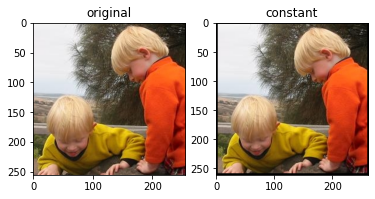

original shape: (256, 256, 3)
padding shape: (262, 262, 3)


In [4]:
# define a function that could return a image matrix with zero-padding based on the input "img" and "p_size".

from  matplotlib import pyplot as plt
import cv2
import numpy as np
def padding_img(img,p_size,style='constant'):
  # -------------- To do ----------------- #
  x=img.shape[0]
  y=img.shape[1]
  new=np.zeros([x+2*p_size,y+2*p_size,3],np.uint8)
  for i in range(x):
    for j in range(y):
      new[i+p_size,j+p_size]=img[i,j]
  return new
  
  

# you should plot the original image, the padding image and their shape.
# -------------- To do ----------------- #
imgp = cv2.imread("twins.jpg")
imgpadok=padding_img(imgp,3)
imgp = imgp[:,:,::-1]
imgpadok = imgpadok[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(imgp)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(imgpadok)
plt.title('constant')
plt.show()
print('original shape:',imgp.shape)
print('padding shape:',imgpadok.shape)


## Step3: Convolution

In [5]:
# define a function that does the convlution operation with the input image matrix and input kernel matrix.

def Convolution(image, Kernel):
  row, col, depth = image.shape
  KernelSize, KernelSize1 = Kernel.shape
  resx=np.zeros((row,col,3)) #initial a result image
  padimg = padding_img(image,(KernelSize-1)//2)

  # -------------- To do ----------------- #
  for i in range(row):
    for j in range(col):
      for k in range(depth):
        t=0
        for x in range(KernelSize):
          for y in range(KernelSize):
            t+= padimg[i+x][j+y][k]*Kernel[x][y]
            resx[i][j][k]=t
  return resx.astype('int')
image = cv2.imread("twins.jpg")
resx = Convolution(image, Gaussian_Kernel) # we get a result matrix here.
print('Convolution Finished!')

Convolution Finished!


## Step3: Result

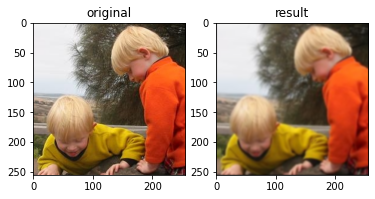

original shape: (256, 256, 3)
result shape: (256, 256, 3)


In [6]:
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.
 
# -------------- To do ----------------- #
image = image[:,:,::-1]
resx = resx[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(resx)
plt.title('result')
plt.show()
print('original shape:',image.shape)
print('result shape:',resx.shape)

# Filtering an Image (Sharpening)

Kernel:
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


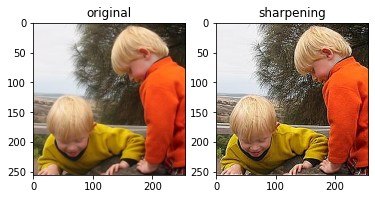

In [7]:
# you could use the conv function in your previous work.
# use [0 -1 0] to sharp your image
#    [-1 5 -1]
#    [0 -1 0]
KernelSize = 3

def Sharpening(image, KernelSize):
  # -------------- To do ----------------- #
  sharpening_k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  print('Kernel:\n',sharpening_k)
  sharpening = Convolution(image, sharpening_k)
  return sharpening

# plot the image and shape
# -------------- To do ----------------- #
image = cv2.imread("twins.jpg")
Sh=Sharpening(image,3)
image = image[:,:,::-1]
Sh = Sh[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(Sh)
plt.title('sharpening')
plt.show()

# Filtering an Image (Mean)

Kernel:
 [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


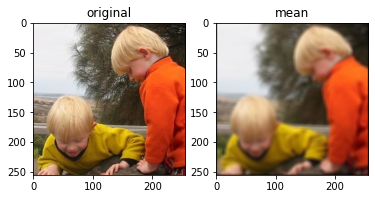

In [8]:
# you could use the conv function in your previous work.
KernelSize = 7

def Mean(image, KernelSize):
  # -------------- To do ----------------- #
  mean_k = np.full((KernelSize,KernelSize),1/KernelSize/KernelSize)
  print('Kernel:\n',mean_k)
  mean_=Convolution(image,mean_k)
  return mean_

# plot the image and shape
# -------------- To do ----------------- #
image = cv2.imread("twins.jpg")
Me=Mean(image,7)
image = image[:,:,::-1]
Me = Me[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(Me)
plt.title('mean')
plt.show()

# Filtering an Image (Shift)

Kernel:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


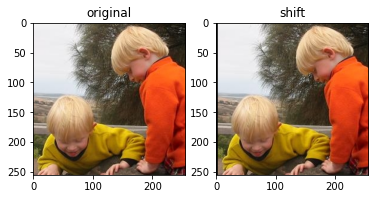

In [9]:
# you could use the function in your previous work.
KernelSize = 7

def Shift(image, KernelSize):
  # -------------- To do ----------------- #
  shift_k=np.zeros(shape=(KernelSize,KernelSize))
  shift_k[KernelSize//2][0]=1
  print('Kernel:\n',shift_k)
  shift_=Convolution(image,shift_k)
  return shift_

# plot the image and shape
# -------------- To do ----------------- #
image = cv2.imread("twins.jpg")
Sf=Shift(image,7)
image = image[:,:,::-1]
Sf = Sf[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(Sf)
plt.title('shift')
plt.show()

# Filtering an Image(Thresholding)

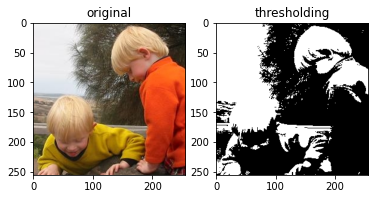

In [10]:
def Thresholding(img, threshold = 125):
  # -------------- To do ----------------- #
  img_=img
  r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
      if(gray[i][j]>threshold):
        img_[i][j]=(255,255,255)
      else:
        img_[i][j]=(0,0,0)
  return img_
    
# plot the image and shape
# -------------- To do ----------------- #
image = cv2.imread("twins.jpg")
image = image[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original')
plt.subplot(1,2,2)
Th=Thresholding(image)
Th = Th[:,:,::-1]
plt.imshow(Th)
plt.title('thresholding')
plt.show()

# Downsampling

In [11]:
# define a function that downsample the image with the input image matrix and the scale.
# the function will return a modefied image matrix.

def DownSamplingFunction(src,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #
  t= int(1/samplingScale)
  dst = src[::t, ::t]
  return dst.astype('uint8')

## Downsampling Without Gaussian Filter

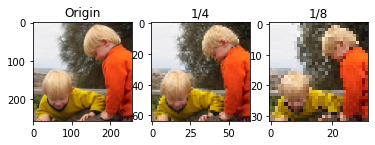

original image:  (256, 256, 3)
1/4 image:  (64, 64, 3)
1/8 image:  (32, 32, 3)


In [12]:
plt.subplot(1,3,1)
img = cv2.imread('twins.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.title('Origin')
# plot your result with 2 scale, 1/4 and 1/8, also their shape.
# ----------- to do ------------------ #
plt.subplot(1,3,2)
rs14=DownSamplingFunction(img,1/4)
b,g,r = cv2.split(rs14)
img_rs14 = cv2.merge([r,g,b])
plt.imshow(img_rs14)
plt.title('1/4')
# plot the image and shape
# -------------- To do ----------------- #
plt.subplot(1,3,3)
rs18=DownSamplingFunction(img,1/8)
b,g,r = cv2.split(rs18)
img_rs18 = cv2.merge([r,g,b])
plt.imshow(img_rs18)
plt.title('1/8')
plt.show()

print('original image: ', img_RGB.shape)
print('1/4 image: ', img_rs14.shape)
print('1/8 image: ', img_rs18.shape)


## Downsampling With Gaussian Filter

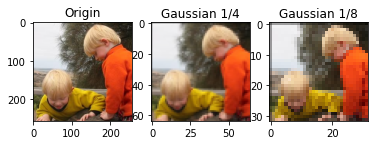

original image:  (256, 256, 3)
1/4 image:  (64, 64, 3)
1/8 image:  (32, 32, 3)


In [13]:
## Gaussian
# ----------- to do 1, filtering the image with gaussian ------------------ # 
# you could grab the function from your previous work!
plt.subplot(1,3,1)
img = cv2.imread('twins.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.title('Origin')

GK = GaussianKernel(7)
img = cv2.imread('twins.jpg')
go = Convolution(img,GK)
# ----------- to do 2, down sampling ------------------ #
# 2 scale, 1/4 and 1/8
plt.subplot(1,3,2)
rs14=DownSamplingFunction(go,1/4)
b,g,r = cv2.split(rs14)
img_rs14 = cv2.merge([r,g,b])
plt.imshow(img_rs14)
plt.title('Gaussian 1/4')

plt.subplot(1,3,3)
rs18=DownSamplingFunction(go,1/8)
b,g,r = cv2.split(rs18)
img_rs18 = cv2.merge([r,g,b])
plt.imshow(img_rs18)
plt.title('Gaussian 1/8')
# ----------- to do 3, plot ------------------ #
# plot your result and also their shape.
plt.show()
print('original image: ', img_RGB.shape)
print('1/4 image: ', img_rs14.shape)
print('1/8 image: ', img_rs18.shape)

# Upsampling

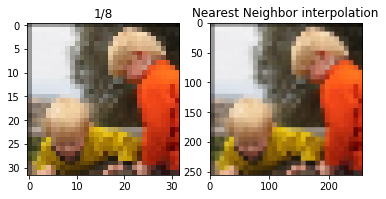

1/8 shape:  (32, 32, 3)
upsampling shape (256, 256, 3)


In [14]:
# ---------- to do 1, upsampling ------------ #
# using 1/8 image from previous work, using nearest neightbor method

plt.subplot(1,2,1)
plt.imshow(img_rs18)
plt.title('1/8')

h, w = rs18.shape[0], rs18.shape[1]
t_img = np.zeros(shape=(8*h,8*w,3),dtype='uint8')
for i in range(8*h):
  for j in range(8*w):
    x=int(j*0.125)
    y=int(i*0.125)
    t_img[i,j]=rs18[y,x]
plt.subplot(1,2,2)
b,g,r = cv2.split(t_img)
img_near = cv2.merge([r,g,b])
plt.imshow(img_near)
plt.title('Nearest Neighbor interpolation')

# ---------- to do 2, plot ------------ #
# you should cover with the result image and the shape
plt.show()
print('1/8 shape: ',img_rs18.shape)
print('upsampling shape',img_near.shape)

# Bicubic Interpolation

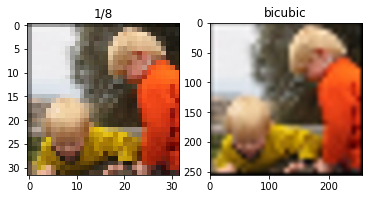

1/8 shape:  (32, 32, 3)
upsampling shape:  (256, 256, 3)


In [15]:
from tqdm import trange

# method 1, using package
img_bic = cv2.resize(rs18, (image.shape[1],image.shape[0]), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood

# method 2, hand craft function
def Bicubic_function(s,a=-0.5):
  # -------------- To do ----------------- #
  if (abs(s) >= 0) & (abs(s) <= 1):
    return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1 
  elif (abs(s) > 1) & (abs(s) <= 2):
      return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
  return 0

def bicubic(img, ratio, a):
  W = int(img.shape[1]*ratio)
  H = int(img.shape[0]*ratio)
  C = 3
  img = padding_img(img,2,style='edge')
  dst = np.zeros((H, W, 3))
  delta = 1/ratio
  for c in range(C):
    for j in range(H):
        for i in range(W):
            x, y = i * delta + 2, j * delta + 2
            x1 = 1 + x - math.floor(x)
            x2 = x - math.floor(x)
            x3 = math.floor(x) + 1 - x
            x4 = math.floor(x) + 2 - x
            y1 = 1 + y - math.floor(y)
            y2 = y - math.floor(y)
            y3 = math.floor(y) + 1 - y
            y4 = math.floor(y) + 2 - y
            mat_l = np.matrix([[Bicubic_function(x1, a), Bicubic_function(x2, a), Bicubic_function(x3, a), Bicubic_function(x4, a)]])
            mat_m = np.matrix([[img[int(y-y1), int(x-x1), c],
                      img[int(y-y2), int(x-x1), c],
                      img[int(y+y3), int(x-x1), c],
                      img[int(y+y4), int(x-x1), c]],
                      [img[int(y-y1), int(x-x2), c],
                      img[int(y-y2), int(x-x2), c],
                      img[int(y+y3), int(x-x2), c],
                      img[int(y+y4), int(x-x2), c]],
                      [img[int(y-y1), int(x+x3), c],
                      img[int(y-y2), int(x+x3), c],
                      img[int(y+y3), int(x+x3), c],
                      img[int(y+y4), int(x+x3), c]],
                      [img[int(y-y1), int(x+x4), c],
                      img[int(y-y2), int(x+x4), c],
                      img[int(y+y3), int(x+x4), c],
                      img[int(y+y4), int(x+x4), c]]])
            mat_r = np.matrix([[Bicubic_function(y1, a)], [Bicubic_function(y2, a)], [Bicubic_function(y3, a)], [Bicubic_function(y4, a)]])
            dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)
  return np.clip(dst,0,255).astype('uint')

img_bic_hand = bicubic(rs18, 8, -0.5)

plt.subplot(1,2,1)
b,g,r = cv2.split(rs18)
img_rs18 = cv2.merge([r,g,b])
plt.imshow(img_rs18)
plt.title('1/8')

plt.subplot(1,2,2)
b,g,r=cv2.split(img_bic_hand)
img_out = cv2.merge([r,g,b])
plt.imshow(img_out)
plt.title('bicubic')
plt.show()

print('1/8 shape: ', rs18.shape)
print('upsampling shape: ', img_bic_hand.shape)